In [1]:
import numpy as np
from pivpy import pivpy, io, graphics
import xarray as xr
import h5py
import glob
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file_list = sorted(glob.glob('../OpenPIV_results/Open_PIV_results_6_Test_*/*.txt'))
file_list
file_list.append(file_list.pop(2))
file_list

['../OpenPIV_results/Open_PIV_results_6_Test_0/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_1/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_2/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_3/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_4/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_5/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_6/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_7/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_8/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_9/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_10/field_A000.txt']

In [3]:
def read_data(file_list):
    data = []
    frame = 0
    for f in file_list:
        data.append(io.load_txt(f,frame=frame))
        frame += 1

    data = xr.concat(data,dim='t')
    data.attrs['units']= ['pix','pix','pix/dt','pix/dt']
    return data
# file_list = sorted(glob.glob('../OpenPIV_results/Open_PIV_results_6_Test_1/*.txt'))

In [4]:
data = read_data(file_list)
data.piv.vorticity();

In [5]:
matfile = '../PIVlab results/6pixels/Karman_frame_00-10_intarea_6px_vorticity.mat'

In [6]:
f = h5py.File(matfile, 'r')
# list(f.keys())

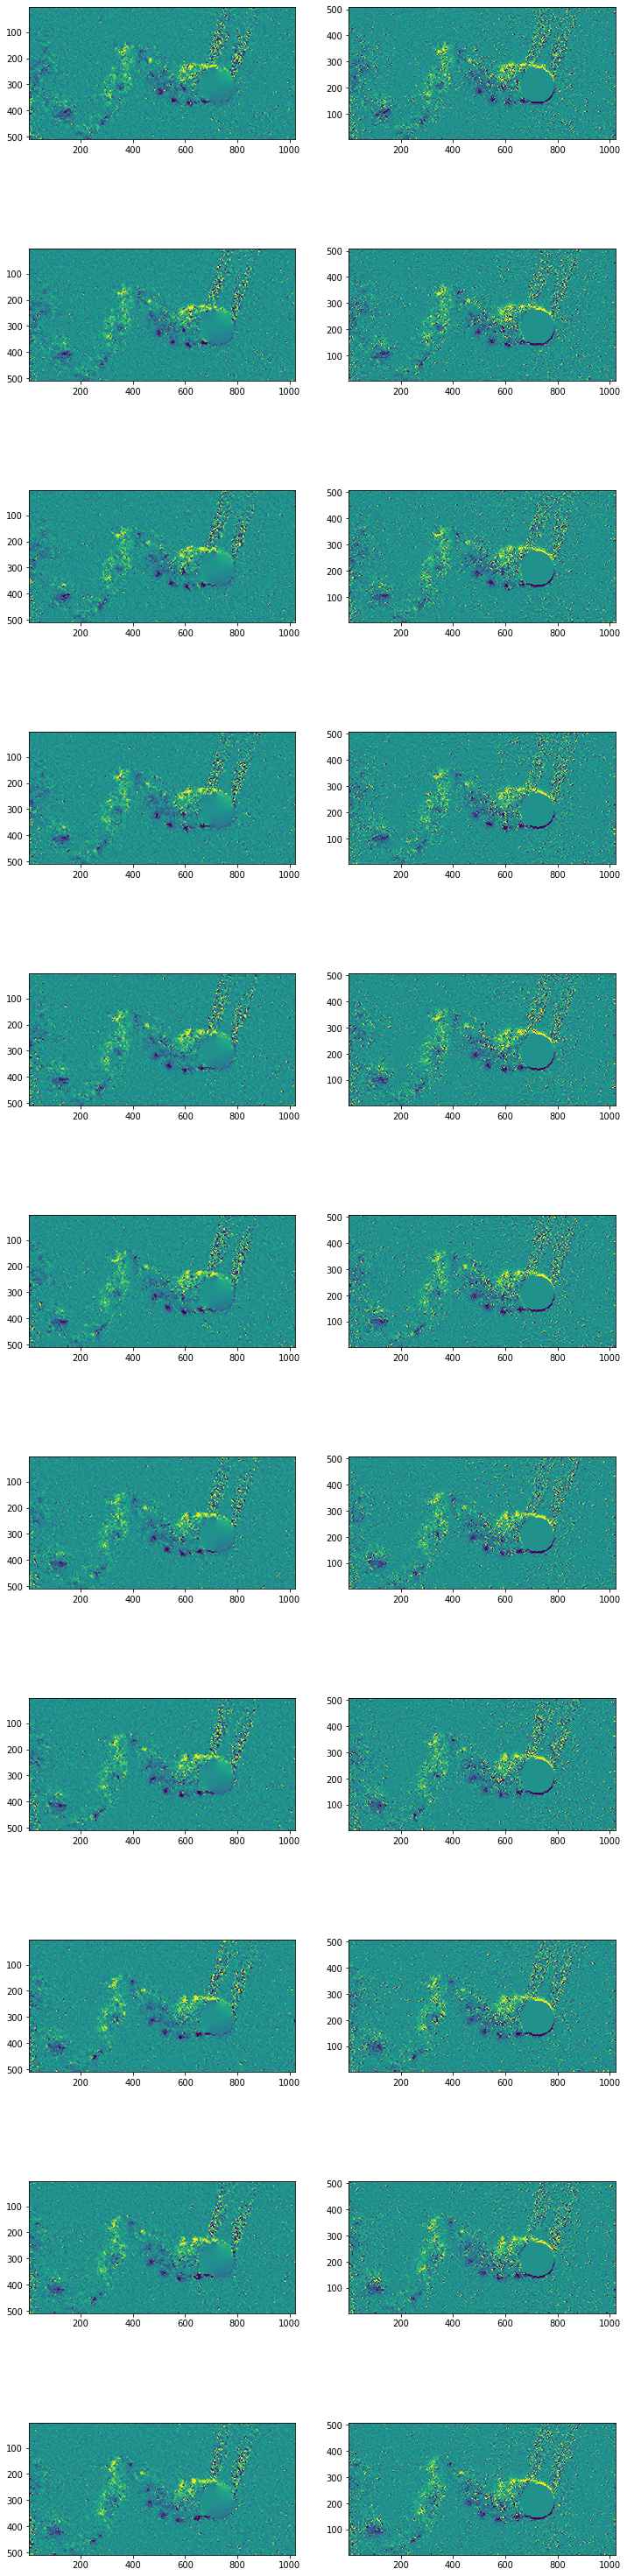

In [9]:
x = np.array(f[f['resultslist'][0][0]])
y = np.array(f[f['resultslist'][0][1]])

fig, ax = plt.subplots(11,2,figsize=(12,55))

for i in range(f['derived'].shape[0]):
    tmp = -np.array(f[f['derived'][i][0]]) # convert to right-handed
    # for ax in axs:
    ax[i,0].pcolor(x, y, tmp, shading='nearest', vmin=-.3, vmax=.3)
    s  = ax[i,1].pcolormesh(data.x,data.y,data.w.T.isel(t=i), shading='nearest', vmin=-.3, vmax=.3)
    ax[i,0].invert_yaxis()
    ax[i,0].set_aspect(1)
    ax[i,1].set_aspect(1)
    # fig.colorbar(s, ax=ax[i,1])
    # plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

#plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)
plt.show()
fig.savefig('side_to_side.png',dpi=200)
